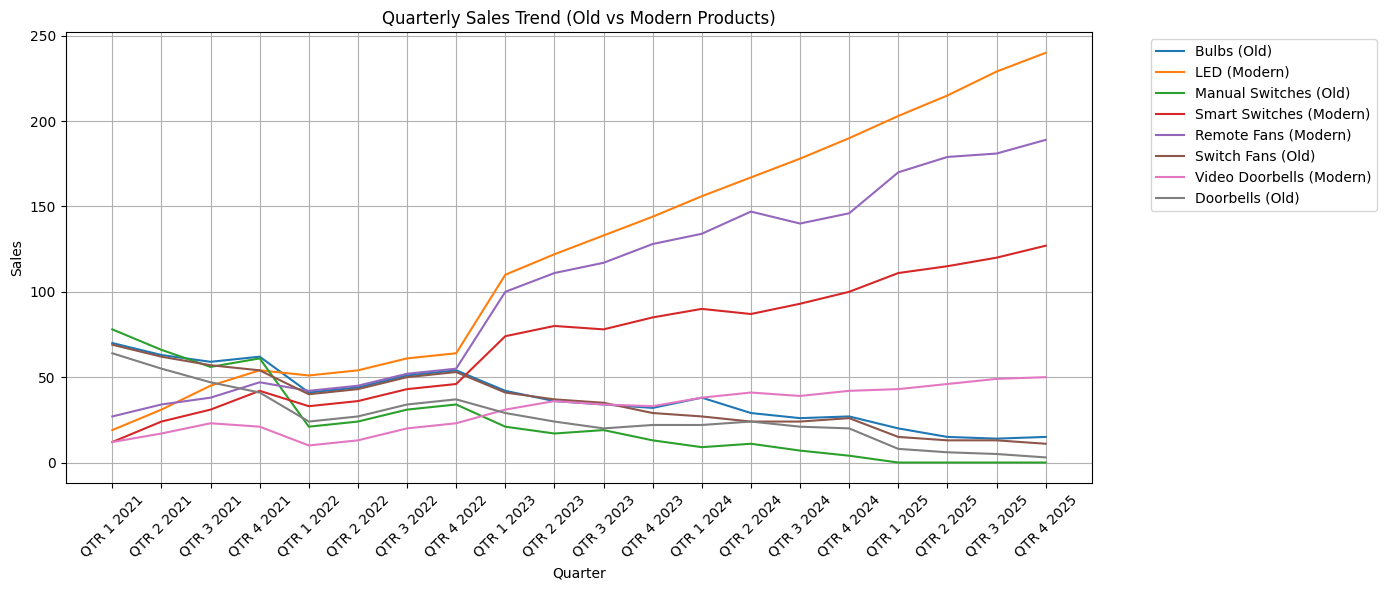

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("sales.xlsx", index_col=0)

# Drop fully blank columns
df = df.dropna(axis=1, how='all')


df['Bulbs (Old)'] = df.get('Bulbs B2B', 0).fillna(0) + df.get('Bulbs B2C', 0).fillna(0)
df['LED (Modern)'] = df.get('LED B2B', 0).fillna(0) + df.get('LED B2C', 0).fillna(0)
df['Manual Switches (Old)'] = df.get('Manual Switches B2B', 0).fillna(0) + df.get('Manual Switches B2C', 0).fillna(0)

df['Smart Switches (Modern)'] = df.get('Smart Touch Switches B2B', 0).fillna(0) + df.get('Smart Touch Switches B2C', 0).fillna(0)
df['Remote Fans (Modern)'] = df.get('Remote Fans B2B', 0).fillna(0) + df.get('Remote Fans B2C', 0).fillna(0)
df['Switch Fans (Old)'] = df.get('Switch Fans B2B', 0).fillna(0) + df.get('Switch Fans B2C', 0).fillna(0)
df['Doorbells (Old)'] = df.get('Doorbells B2B', 0).fillna(0) + df.get('Doorbells B2C', 0).fillna(0)

df['Video Doorbells (Modern)'] = df.get('Video Doorbells B2B', 0).fillna(0) + df.get('Video Doorbells B2C', 0).fillna(0)

# ✅ Use correct column names
merged_cols = [
    'Bulbs (Old)', 'LED (Modern)', 'Manual Switches (Old)',
    'Smart Switches (Modern)', 'Remote Fans (Modern)', 'Switch Fans (Old)', 'Video Doorbells (Modern)','Doorbells (Old)'
]

# Plot
plt.figure(figsize=(14, 6))
for col in merged_cols:
    if col in df.columns:
        plt.plot(df.index, df[col], label=col)

plt.title("Quarterly Sales Trend (Old vs Modern Products)")
plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()





📊 Year-wise Sales Summary (in Units):

         B2B  B2C  Old   New  Old B2B  Old B2C  New B2B  New B2C
Year                                                            
2024.0  1359  768  499  1788      314      185     1145      643
2025.0  1516  889  326  2267      206      120     1425      842


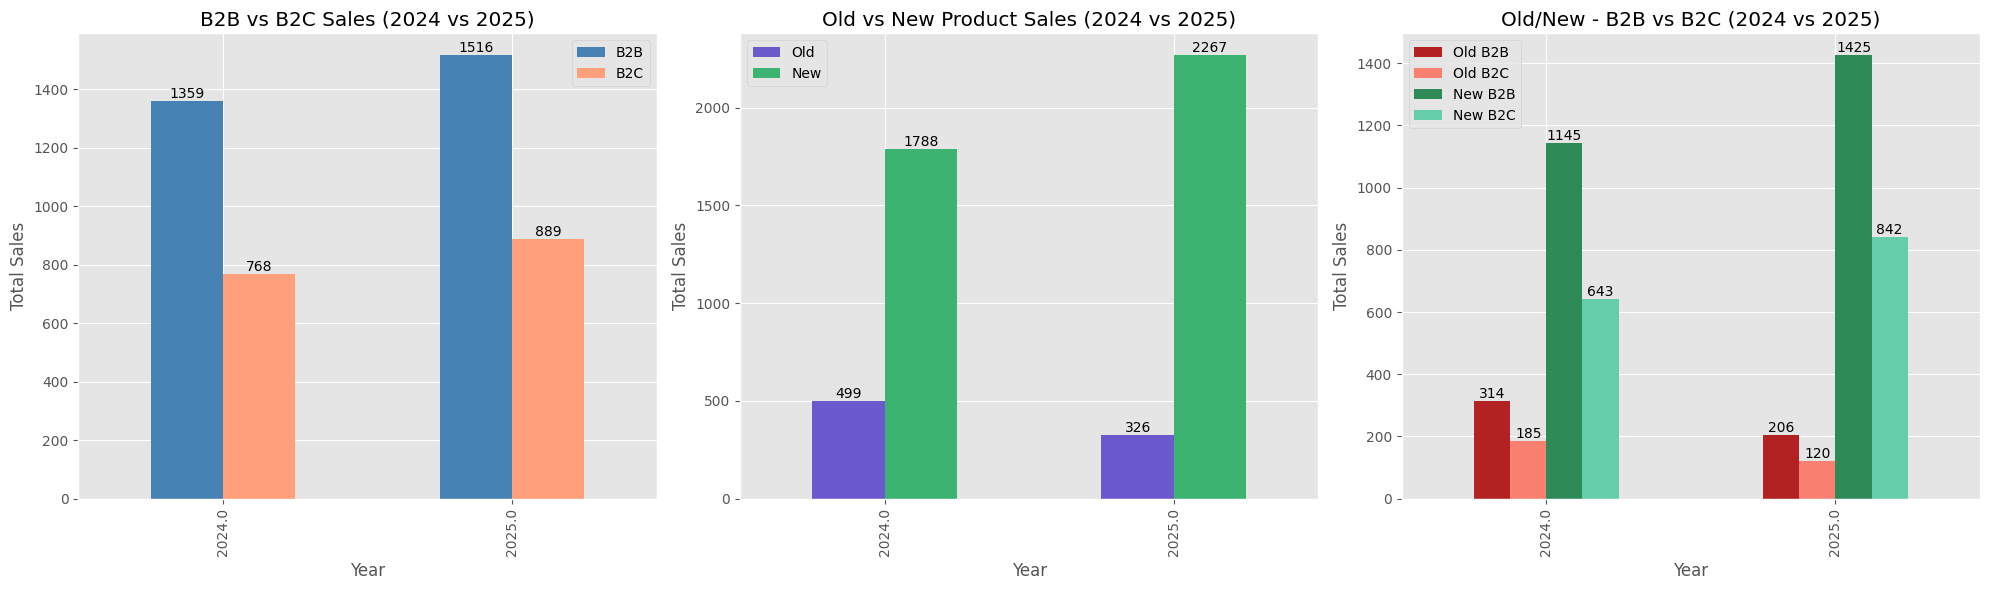

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("sales.xlsx")

# Drop fully blank columns
df = df.dropna(axis=1, how='all')
df.columns = df.columns.str.strip()

# Keep only rows with valid 'Financial Period' format
df['Financial Period'] = df['Financial Period'].astype(str).str.strip()
df = df[df['Financial Period'].str.match(r'QTR \d \d{4}', na=False)]

# Extract year
df['Year'] = df['Financial Period'].str.extract(r'QTR \d (\d{4})').astype(float)

# Define product categories
old_products = ['Bulbs', 'Switch Fans', 'Manual Switches', 'Doorbells']
new_products = ['LED', 'Smart Touch Switches', 'Remote Fans', 'Video Doorbells']

b2b_cols = [col for col in df.columns if 'B2B' in col]
b2c_cols = [col for col in df.columns if 'B2C' in col]

def is_old(col): return any(prod in col for prod in old_products)
def is_new(col): return any(prod in col for prod in new_products)

# Calculate totals by category and year
results = {
    'B2B': df.groupby('Year')[b2b_cols].sum().sum(axis=1),
    'B2C': df.groupby('Year')[b2c_cols].sum().sum(axis=1),
    'Old': df.groupby('Year')[[col for col in df.columns if is_old(col)]].sum().sum(axis=1),
    'New': df.groupby('Year')[[col for col in df.columns if is_new(col)]].sum().sum(axis=1),
    'Old B2B': df.groupby('Year')[[col for col in b2b_cols if is_old(col)]].sum().sum(axis=1),
    'Old B2C': df.groupby('Year')[[col for col in b2c_cols if is_old(col)]].sum().sum(axis=1),
    'New B2B': df.groupby('Year')[[col for col in b2b_cols if is_new(col)]].sum().sum(axis=1),
    'New B2C': df.groupby('Year')[[col for col in b2c_cols if is_new(col)]].sum().sum(axis=1),
}

# Create DataFrame and filter for 2024–2025
summary_df = pd.DataFrame(results).round(2)
summary_df = summary_df.loc[[2024.0, 2025.0]]

# Print exact values
print("\n📊 Year-wise Sales Summary (in Units):\n")
print(summary_df.fillna(0))

# Plotting
plt.style.use("ggplot")
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Graph 1: B2B vs B2C
summary_df[['B2B', 'B2C']].plot(kind='bar', ax=axes[0], color=['#4682B4', '#FFA07A'])
axes[0].set_title("B2B vs B2C Sales (2024 vs 2025)")
axes[0].set_ylabel("Total Sales")
axes[0].legend()
axes[0].bar_label(axes[0].containers[0])
axes[0].bar_label(axes[0].containers[1])

# Graph 2: Old vs New Products
summary_df[['Old', 'New']].plot(kind='bar', ax=axes[1], color=['#6A5ACD', '#3CB371'])
axes[1].set_title("Old vs New Product Sales (2024 vs 2025)")
axes[1].set_ylabel("Total Sales")
axes[1].legend()
axes[1].bar_label(axes[1].containers[0])
axes[1].bar_label(axes[1].containers[1])

# Graph 3: Combined Old B2B/B2C and New B2B/B2C
summary_df[['Old B2B', 'Old B2C', 'New B2B', 'New B2C']].plot(
    kind='bar', ax=axes[2],
    color=['#B22222', '#FA8072', '#2E8B57', '#66CDAA']
)
axes[2].set_title("Old/New - B2B vs B2C (2024 vs 2025)")
axes[2].set_ylabel("Total Sales")
axes[2].legend()
for container in axes[2].containers:
    axes[2].bar_label(container)

plt.tight_layout()
plt.show()


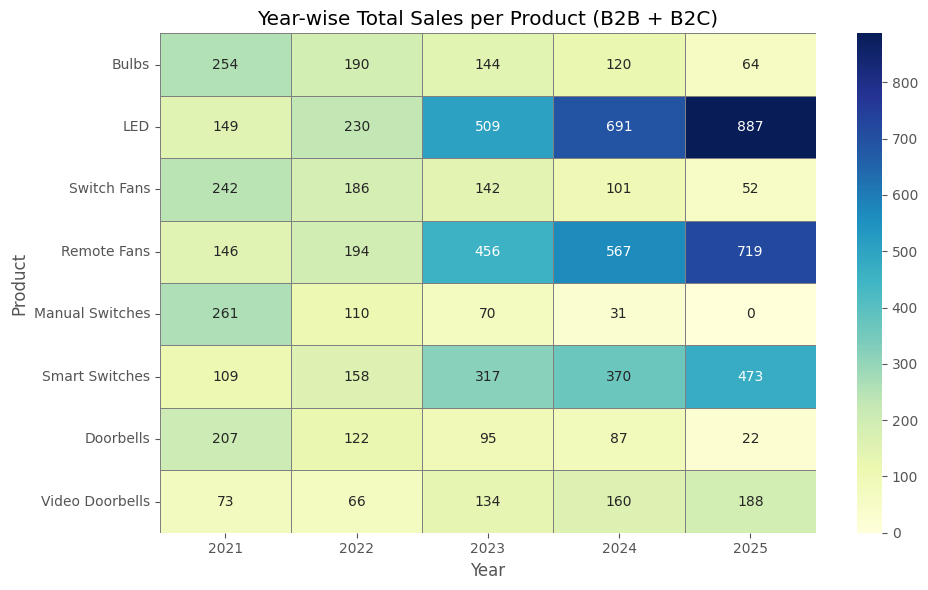

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel("sales.xlsx")

# Drop unnamed/blank columns
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
df.columns = df.columns.str.strip()

# Clean and extract 'Year' from 'Financial Period'
df['Financial Period'] = df['Financial Period'].astype(str).str.strip()
df = df[df['Financial Period'].str.match(r'QTR \d \d{4}', na=False)]
df['Year'] = df['Financial Period'].str.extract(r'QTR \d (\d{4})')[0].astype(int)
df = df.drop(columns='Financial Period')

# Drop fully empty columns
df = df.dropna(axis=1, how='all')

# Define product groupings (B2B + B2C)
product_groups = {
    'Bulbs': ['Bulbs B2B', 'Bulbs B2C'],
    'LED': ['LED B2B', 'LED B2C'],
    'Switch Fans': ['Switch Fans B2B', 'Switch Fans B2C'],
    'Remote Fans': ['Remote Fans B2B', 'Remote Fans B2C'],
    'Manual Switches': ['Manual Switches B2B', 'Manual Switches B2C'],
    'Smart Switches': ['Smart Touch Switches B2B', 'Smart Touch Switches B2C'],
    'Doorbells': ['Doorbells B2B', 'Doorbells B2C'],
    'Video Doorbells': ['Video Doorbells B2B', 'Video Doorbells B2C'],
}

# Sum B2B + B2C into single product columns
for product, cols in product_groups.items():
    df[product] = df[cols].sum(axis=1, skipna=True)

# Group by Year and aggregate sales
yearly_sales = df.groupby('Year')[list(product_groups.keys())].sum().T

# Drop rows where all values are 0
yearly_sales = yearly_sales.loc[~(yearly_sales == 0).all(axis=1)]

# Plot heatmap
plt.figure(figsize=(10, max(6, len(yearly_sales)*0.5)))
sns.heatmap(yearly_sales, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.4, linecolor='gray')

plt.title("Year-wise Total Sales per Product (B2B + B2C)")
plt.xlabel("Year")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


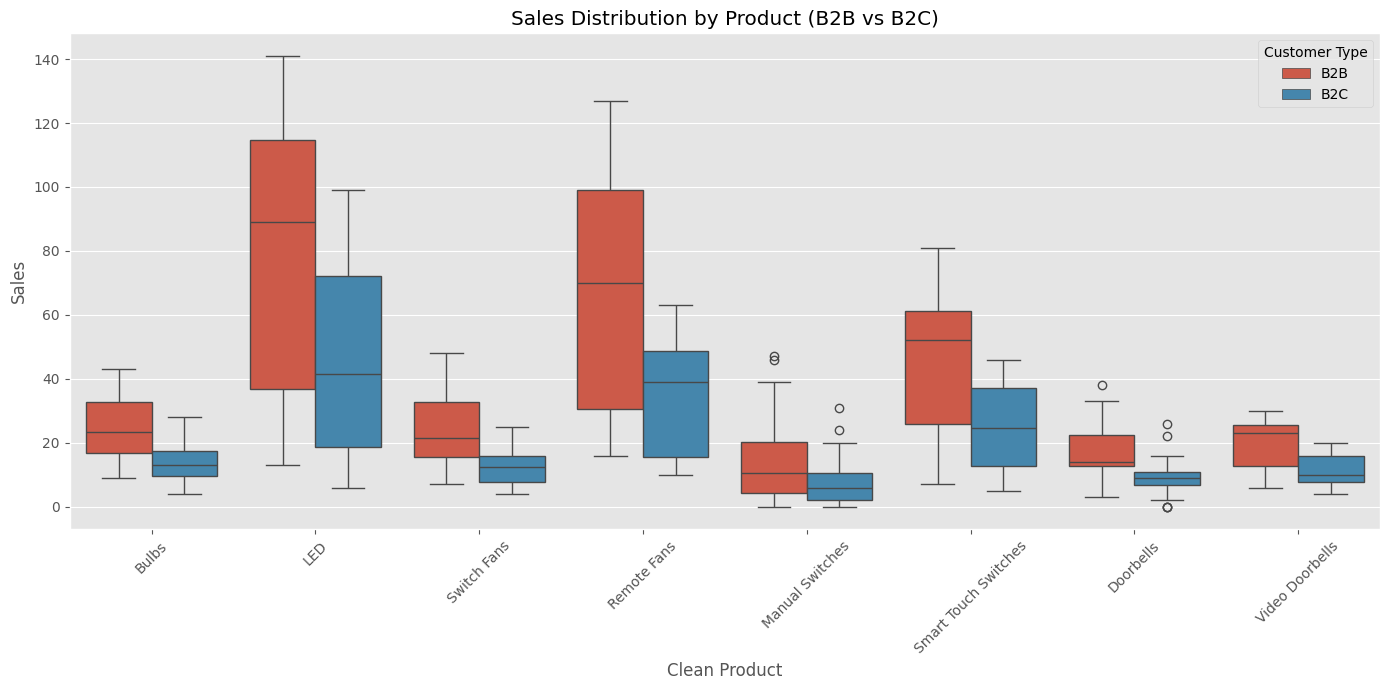

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Drop Year if exists and reset index
df_plot = df.drop(columns='Year', errors='ignore').copy()
df_plot = df_plot.reset_index().rename(columns={'index': 'Quarter'})

# Melt into long format
df_melted = df_plot.melt(id_vars='Quarter', var_name='Product', value_name='Sales')

# Extract 'Type' (B2B or B2C) from product name
df_melted['Type'] = df_melted['Product'].apply(
    lambda x: 'B2B' if 'B2B' in x else ('B2C' if 'B2C' in x else None)
)

# Filter out rows where Type is None (like Unnamed or merged columns)
df_melted = df_melted[df_melted['Type'].notna()]

# Clean product names (remove " B2B"/" B2C")
df_melted['Clean Product'] = df_melted['Product'].str.replace(r'\s+B2[BC]', '', regex=True)

# Plot
plt.figure(figsize=(14, 7))
sns.boxplot(x='Clean Product', y='Sales', hue='Type', data=df_melted)

plt.title("Sales Distribution by Product (B2B vs B2C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis='y')
plt.legend(title='Customer Type')
plt.show()


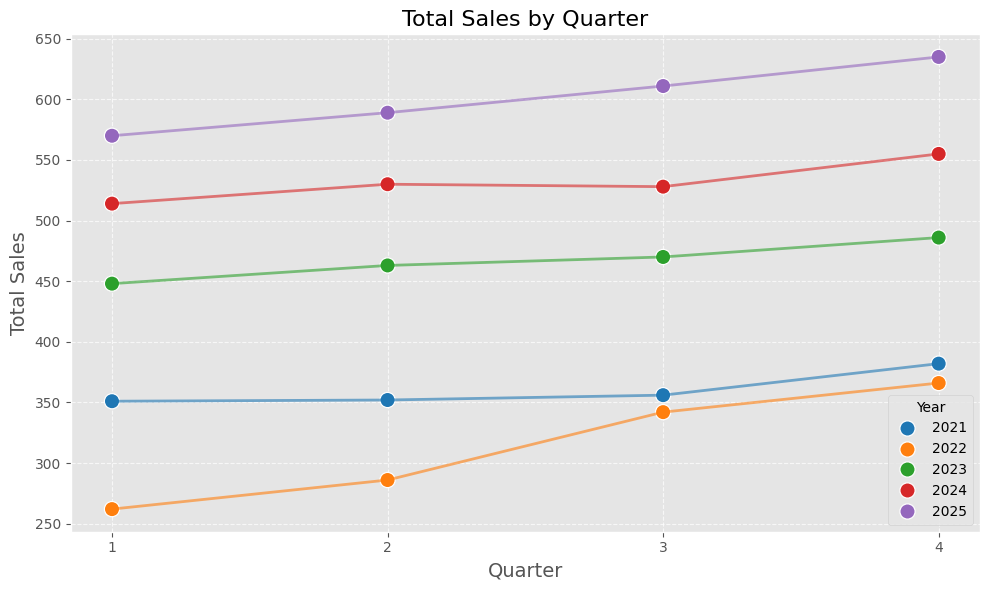

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the file normally
df = pd.read_excel("sales.xlsx")

# Clean column names
df.columns = df.columns.str.strip()

# Strip 'Financial Period' column
df['Financial Period'] = df['Financial Period'].astype(str).str.strip()

# Extract Quarter and Year
df['Quarter'] = df['Financial Period'].str.extract(r'QTR (\d)')[0].astype(float)
df['Year'] = df['Financial Period'].str.extract(r'(\d{4})')[0].astype(float)

# Drop missing Quarter/Year
df = df.dropna(subset=['Quarter', 'Year'])

# Convert product columns to numeric
product_cols = df.columns.difference(['Financial Period', 'Quarter', 'Year'])
df[product_cols] = df[product_cols].apply(pd.to_numeric, errors='coerce')

# Total Sales
df['Total Sales'] = df[product_cols].sum(axis=1)

# Group by Year and Quarter
quarterly_sales = df.groupby(['Year', 'Quarter'], as_index=False)['Total Sales'].sum()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=quarterly_sales,
    x='Quarter',
    y='Total Sales',
    hue=quarterly_sales['Year'].astype(int),
    palette='tab10',
    s=120
)
sns.lineplot(
    data=quarterly_sales,
    x='Quarter',
    y='Total Sales',
    hue=quarterly_sales['Year'].astype(int),
    palette='tab10',
    legend=False,
    linewidth=2,
    alpha=0.6
)

plt.title("Total Sales by Quarter", fontsize=16)
plt.xlabel("Quarter", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.xticks([1, 2, 3, 4])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Year')
plt.tight_layout()
plt.show()
